**Change Runtime to GPU before running this file**

# Training of BasicSR

In [ ]:
%cd /content

/content


In [ ]:
!git clone https://github.com/prayas99/BasicSR2

Cloning into 'BasicSR2'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 86 (delta 13), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (86/86), done.


In [ ]:
%cd /content/BasicSR2/BasicSR_training

/content/BasicSR2/BasicSR_training


In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':"1bO3WKGQTyu_8ZiJkmA8YCIZbbJdlbPkZ"})
downloaded.GetContentFile('X2.zip')

In [ ]:
!unzip '/content/BasicSR2/BasicSR_training/X2.zip' -d '/content/BasicSR2/BasicSR_training/trainsets/trainH'

Archive:  /content/BasicSR2/BasicSR_training/X2.zip
   creating: /content/BasicSR2/BasicSR_training/trainsets/trainH/X2/
 extracting: /content/BasicSR2/BasicSR_training/trainsets/trainH/X2/0001x2.png  
  inflating: /content/BasicSR2/BasicSR_training/trainsets/trainH/X2/0002x2.png  
 extracting: /content/BasicSR2/BasicSR_training/trainsets/trainH/X2/0003x2.png  
 extracting: /content/BasicSR2/BasicSR_training/trainsets/trainH/X2/0004x2.png  
 extracting: /content/BasicSR2/BasicSR_training/trainsets/trainH/X2/0005x2.png  
 extracting: /content/BasicSR2/BasicSR_training/trainsets/trainH/X2/0006x2.png  
 extracting: /content/BasicSR2/BasicSR_training/trainsets/trainH/X2/0007x2.png  
 extracting: /content/BasicSR2/BasicSR_training/trainsets/trainH/X2/0008x2.png  
 extracting: /content/BasicSR2/BasicSR_training/trainsets/trainH/X2/0009x2.png  
 extracting: /content/BasicSR2/BasicSR_training/trainsets/trainH/X2/0010x2.png  
 extracting: /content/BasicSR2/BasicSR_training/trainsets/trainH/X2/0

In [ ]:
!python /content/BasicSR2/BasicSR_training/main_train_msrresnet_psnr.py

export CUDA_VISIBLE_DEVICES=0
LogHandlers setup!
20-12-08 14:36:06.165 :   task: msrresnet_psnr
  model: plain
  gpu_ids: [0]
  scale: 4
  n_channels: 3
  sigma: 0
  sigma_test: 0
  merge_bn: False
  merge_bn_startpoint: 400000
  path:[
    root: superresolution
    pretrained_netG: None
    task: superresolution/msrresnet_psnr
    log: superresolution/msrresnet_psnr
    options: superresolution/msrresnet_psnr/options
    models: superresolution/msrresnet_psnr/models
    images: superresolution/msrresnet_psnr/images
  ]
  datasets:[
    train:[
      name: train_dataset
      dataset_type: sr
      dataroot_H: trainsets/trainH
      dataroot_L: None
      H_size: 96
      dataloader_shuffle: True
      dataloader_num_workers: 8
      dataloader_batch_size: 32
      phase: train
      scale: 4
      n_channels: 3
    ]
    test:[
      name: test_dataset
      dataset_type: sr
      dataroot_H: testsets/set5
      dataroot_L: None
      phase: test
      scale: 4
      n_channels: 3
   

# Testing

In [ ]:
%cd /content

/content


In [ ]:
!git clone https://github.com/xinntao/BasicSR.git
%cd BasicSR

Cloning into 'BasicSR'...
remote: Enumerating objects: 4226, done.
remote: Total 4226 (delta 0), reused 0 (delta 0), pack-reused 4226
Receiving objects: 100% (4226/4226), 2.42 MiB | 1.12 MiB/s, done.
Resolving deltas: 100% (2560/2560), done.
/content/BasicSR


In [ ]:
!pip install torch torchvision
!pip install -r requirements.txt
!python setup.py develop --no_cuda_ext
import torch

     |████████████████████████████████| 12.2MB 9.5MB/s 
     |████████████████████████████████| 194kB 36.0MB/s 
running develop
running egg_info
creating basicsr.egg-info
writing basicsr.egg-info/PKG-INFO
writing dependency_links to basicsr.egg-info/dependency_links.txt
writing requirements to basicsr.egg-info/requires.txt
writing top-level names to basicsr.egg-info/top_level.txt
writing manifest file 'basicsr.egg-info/SOURCES.txt'
writing manifest file 'basicsr.egg-info/SOURCES.txt'
/usr/local/lib/python3.6/dist-packages/torch/utils/cpp_extension.py:339: UserWarning: Attempted to use ninja as the BuildExtension backend but we could not find ninja.. Falling back to using the slow distutils backend.
  warnings.warn(msg.format('we could not find ninja.'))
running build_ext
Creating /usr/local/lib/python3.6/dist-packages/basicsr.egg-link (link to .)
Adding basicsr 1.2.0+1464d8e to easy-install.pth file

Installed /content/BasicSR
Processing dependencies for basicsr==1.2.0+1464d8e
Searchin

In [ ]:
# Downloading Pretrained ESRGAN 
!python scripts/download_pretrained_models.py ESRGAN

Download 63.8 MB / 63.8 MB: 100% 2043/2043 [00:00<00:00, 2315.29chunk/s]
Download 63.8 MB / 63.8 MB: 100% 2043/2043 [00:01<00:00, 1601.36chunk/s]


In [ ]:
# Downloading TestSets
!python scripts/data_preparation/download_datasets.py Set5
!python scripts/data_preparation/download_datasets.py Set14

Download 2.0 MB / 2.0 MB: 100% 65/65 [00:00<00:00, 2970.70chunk/s]
Extract /content/BasicSR/datasets/Set5.zip to /content/BasicSR/datasets/Set5
Move /content/BasicSR/datasets/Set5/Set5 to /content/BasicSR/datasets/Set5
Download 11.9 MB / 11.9 MB: 100% 381/381 [00:00<00:00, 3391.54chunk/s]
Extract /content/BasicSR/datasets/Set14.zip to /content/BasicSR/datasets/Set14
Move /content/BasicSR/datasets/Set14/Set14 to /content/BasicSR/datasets/Set14


## Inference method 1: Test with configuration file

1. First, you need to modify the configuration yml file **options/test/ESRGAN/test_ESRGAN_x4_woGT.yml**, especially the dataset path and pretrained model path
```yaml
name: ESRGAN_SRx4_DF2KOST_official
model_type: ESRGANModel
scale: 4
num_gpu: 1  # set num_gpu: 0 for cpu mode
manual_seed: 0
# datasets
datasets:
  test_1:  # the 1st test dataset
    name: Set5
    type: SingleImageDataset
    dataroot_lq: datasets/Set5/LRbicx4
    io_backend:
      type: disk
  test_2:  # the 2st test dataset
    name: Set14
    type: SingleImageDataset
    dataroot_lq: datasets/Set14/LRbicx4
    io_backend:
      type: disk
# network structures
network_g:
  type: RRDBNet
  num_in_ch: 3
  num_out_ch: 3
  num_feat: 64
  num_block: 23
  num_grow_ch: 32
# path
path:
  pretrain_network_g: experiments/pretrained_models/ESRGAN/ESRGAN_SRx4_DF2KOST_official-ff704c30.pth
  strict_load_g: true
# validation settings
val:
  save_img: true
  suffix: ~  # add suffix to saved images, if None, use exp name
```

In [ ]:
!python basicsr/test.py -opt options/test/ESRGAN/test_ESRGAN_x4_woGT.yml

Cannot import dcn. Ignore this warning if dcn is not used. Otherwise install BasicSR with compiling dcn.
Cannot import fused_act and upfirdn2d. Ignore this warning if they are not used. Otherwise install BasicSR with compiling them.
Disable distributed.
2020-12-08 15:09:37,633 INFO: 
                ____                _       _____  ____
               / __ ) ____ _ _____ (_)_____/ ___/ / __ \
              / __  |/ __ `// ___// // ___/\__ \ / /_/ /
             / /_/ // /_/ /(__  )/ // /__ ___/ // _, _/
            /_____/ \__,_//____//_/ \___//____//_/ |_|
     ______                   __   __                 __      __
    / ____/____   ____   ____/ /  / /   __  __ _____ / /__   / /
   / / __ / __ \ / __ \ / __  /  / /   / / / // ___// //_/  / /
  / /_/ // /_/ // /_/ // /_/ /  / /___/ /_/ // /__ / /<    /_/
  \____/ \____/ \____/ \____/  /_____/\____/ \___//_/|_|  (_)
    
Version Information: 
	BasicSR: 1.2.0+1464d8e
	PyTorch: 1.7.0+cu101
	TorchVision: 0.8.1+cu101
2020-12-08 15:09

## Inference method 2: A minimum snippet of testing codes

Make modification accordingly and the restoration results are in the **results/ESRGAN** folder.

In [ ]:
import cv2
import glob
import numpy as np
import os
import torch

from basicsr.models.archs.rrdbnet_arch import RRDBNet

# configuration
model_path = 'experiments/pretrained_models/ESRGAN/ESRGAN_SRx4_DF2KOST_official-ff704c30.pth'
folder = 'datasets/Set14/LRbicx4'
device = 'cuda'

device = torch.device(device)

# set up model
model = RRDBNet(
    num_in_ch=3, num_out_ch=3, num_feat=64, num_block=23, num_grow_ch=32)
model.load_state_dict(torch.load(model_path)['params'], strict=True)
model.eval()
model = model.to(device)

os.makedirs('results/ESRGAN', exist_ok=True)
for idx, path in enumerate(sorted(glob.glob(os.path.join(folder, '*')))):
    imgname = os.path.splitext(os.path.basename(path))[0]
    print(idx, imgname)
    # read image
    img = cv2.imread(path, cv2.IMREAD_COLOR).astype(np.float32) / 255.
    img = torch.from_numpy(np.transpose(img[:, :, [2, 1, 0]],
                                        (2, 0, 1))).float()
    img = img.unsqueeze(0).to(device)
    # inference
    with torch.no_grad():
        output = model(img)
    # save image
    output = output.data.squeeze().float().cpu().clamp_(0, 1).numpy()
    output = np.transpose(output[[2, 1, 0], :, :], (1, 2, 0))
    output = (output * 255.0).round().astype(np.uint8)
    cv2.imwrite(f'results/ESRGAN/{imgname}_ESRGAN.png', output)


Cannot import dcn. Ignore this warning if dcn is not used. Otherwise install BasicSR with compiling dcn.
Cannot import fused_act and upfirdn2d. Ignore this warning if they are not used. Otherwise install BasicSR with compiling them.
0 baboon
1 barbara
2 bridge
3 coastguard
4 comic
5 face
6 flowers
7 foreman
8 lenna
9 man
10 monarch
11 pepper
12 ppt3
13 zebra


In [ ]:
!python inference/inference_esrgan.py --model_path experiments/pretrained_models/ESRGAN/ESRGAN_SRx4_DF2KOST_official-ff704c30.pth --folder datasets/Set14/LRbicx4

Cannot import dcn. Ignore this warning if dcn is not used. Otherwise install BasicSR with compiling dcn.
Cannot import fused_act and upfirdn2d. Ignore this warning if they are not used. Otherwise install BasicSR with compiling them.
Testing 0 baboon
Testing 1 barbara
Testing 2 bridge
Testing 3 coastguard
Testing 4 comic
Testing 5 face
Testing 6 flowers
Testing 7 foreman
Testing 8 lenna
Testing 9 man
Testing 10 monarch
Testing 11 pepper
Testing 12 ppt3
Testing 13 zebra


**The Results are stored in /content/BasicSR/results/ESRGAN**

Show results

We show and compare the input image, ESRGAN results and the Ground-truth (GT) image.

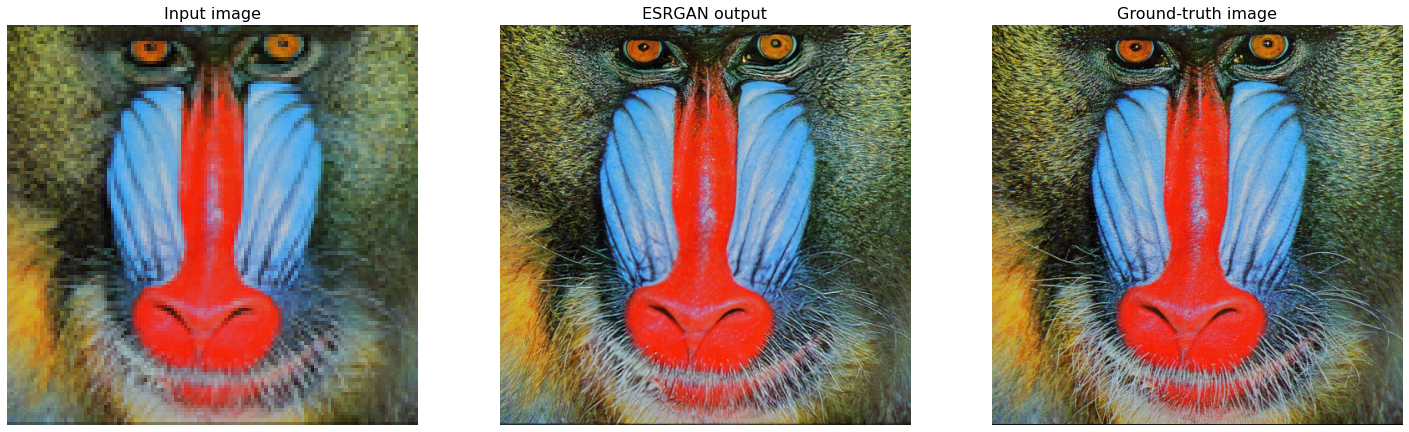

In [ ]:
import cv2
import matplotlib.pyplot as plt

def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# read images
img_input = imread('datasets/Set14/LRbicx4/baboon.png')
img_esrgan = imread('results/ESRGAN/baboon_ESRGAN.png')
img_gt = imread('datasets/Set14/GTmod12/baboon.png')

# show and compare the results
fig = plt.figure(figsize=(25, 10))
ax1 = fig.add_subplot(1, 3, 1) 
plt.title('Input image', fontsize=16)
ax1.axis('off')
ax2 = fig.add_subplot(1, 3, 2)
plt.title('ESRGAN output', fontsize=16)
ax2.axis('off')
ax3 = fig.add_subplot(1, 3, 3) 
plt.title('Ground-truth image', fontsize=16)
ax3.axis('off')
ax1.imshow(img_input)
ax2.imshow(img_esrgan)
ax3.imshow(img_gt)

# Clean Image Generation (Deraining on a video)

In [ ]:
%cd /content

/content


In [ ]:
!pip install PyDrive

In [ ]:
!pip install ffmpeg-python

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# Taking a sample video with rainstreaks
downloaded = drive.CreateFile({'id':"1qxFobHD8SExOQ-LoDybLG7m2B82LBbhg"})   
downloaded.GetContentFile('1.mov')

In [ ]:
import time
import os
import cv2
import imageio 
import numpy as np
import skimage
import skimage.io as sio
import torch.multiprocessing as mp
from PIL import Image
import json
import ffmpeg
import scipy.io as io

In [ ]:
def read_video(videoPath):
    out, _ = (
    ffmpeg
    .input(videoPath)
    .output('pipe:', format='rawvideo', pix_fmt='rgb24')
    .run(capture_stdout=True)
    )
    probe = ffmpeg.probe(videoPath)
    video_info = next(s for s in probe['streams'] if s['codec_type'] == 'video')
    width = int(video_info['width'])
    height = int(video_info['height'])
    video = (
    np
    .frombuffer(out,np.uint8)
    .reshape([-1, height, width, 3])
    )
    return video

In [ ]:
def get_max_occur_number(arr):
    bc = np.bincount(arr)
    argmax = np.argmax(bc)
    count = bc[argmax]
    return argmax,count

def job(q,y,Range):
    w1,w2,h1,h2 = Range
    percent_min = []
    percent_max = []
    maps = np.zeros((int(h2-h1)*int(w2-w1),101))
    for h in range(int(h1),int(h2)):
        for w in range(int(w1),int(w2)):
            argmax,count = get_max_occur_number(y[:,h,w])
            index = [i for (i, j) in enumerate(sorted(y[:,h,w])) if j == argmax ]
            percent_min.append(index[0]/len(y[:,h,w])*100)
            percent_max.append(index[-1]/len(y[:,h,w])*100)
    for i in range(int(h2-h1)*int(w2-w1)):
        for j in range(0,101):
            if j >= percent_min[i] and j <= percent_max[i]:
                maps[i,j]=1
    print('range {w1} to {w2}, {h1} to {h2} is being stored...'.format(w1=w1,w2=w2,h1=h1,h2=h2))
    q.put(maps)
    print('range {w1} to {w2}, {h1} to {h2} was stored successfully...'.format(w1=w1,w2=w2,h1=h1,h2=h2))

def computer_percentile(y):
    _,H,W = y.shape

    q1 = mp.SimpleQueue()
    q2 = mp.SimpleQueue()
    q3 = mp.SimpleQueue()
    q4 = mp.SimpleQueue()
    q5 = mp.SimpleQueue()
    q6 = mp.SimpleQueue()
    q7 = mp.SimpleQueue()
    q8 = mp.SimpleQueue()

    R1 = (W/4*0, W/4*1, 0,   H/2 )
    R2 = (W/4*1, W/4*2, 0,   H/2 )
    R3 = (W/4*2, W/4*3, 0,   H/2 )
    R4 = (W/4*3, W/4*4, 0,   H/2 )
    R5 = (W/4*0, W/4*1, H/2,  H  )
    R6 = (W/4*1, W/4*2, H/2,  H  )
    R7 = (W/4*2, W/4*3, H/2,  H  )
    R8 = (W/4*3, W/4*4, H/2,  H  )

    p1 = mp.Process(target=job,args=(q1,y,R1))
    p2 = mp.Process(target=job,args=(q2,y,R2))
    p3 = mp.Process(target=job,args=(q3,y,R3))
    p4 = mp.Process(target=job,args=(q4,y,R4))
    p5 = mp.Process(target=job,args=(q5,y,R5))
    p6 = mp.Process(target=job,args=(q6,y,R6))
    p7 = mp.Process(target=job,args=(q7,y,R7))
    p8 = mp.Process(target=job,args=(q8,y,R8))

    p1.deamon = True
    p2.deamon = True
    p3.deamon = True
    p4.deamon = True
    p5.deamon = True
    p6.deamon = True
    p7.deamon = True
    p8.deamon = True

    p1.start()
    p2.start()
    p3.start()
    p4.start()
    p5.start()
    p6.start()
    p7.start()
    p8.start()

    map1 = q1.get()
    map2 = q2.get()
    map3 = q3.get()
    map4 = q4.get()
    map5 = q5.get()
    map6 = q6.get()
    map7 = q7.get()
    map8 = q8.get()
    maps = np.concatenate((map1,map2,map3,map4,map5,map6,map7,map8),axis=0)
    percentile = np.argmax([np.sum(maps[:,i]) for i in range(0,101)])
    return percentile
def RGB2YCbCr(rgb):
        m = np.array([[ 0.29900, -0.16874,  0.50000],
                    [0.58700, -0.33126, -0.41869],
                    [ 0.11400, 0.50000, -0.08131]])
        ycbcr = np.dot(rgb,m)
        ycbcr[:,:,1:]+=128.0
        return ycbcr.astype('uint8')

In [ ]:
video_name = '1.mov'
frame_number = 10 
rgb = read_video('/content/1.mov')
rgb = rgb[:frame_number]

In [ ]:
ycbcr = RGB2YCbCr(rgb)
y  = ycbcr[:,:,:,0]

end = time.time()
percentile = computer_percentile(y) 
print(time.time()-end)
print('Saving image...')
print(time.time()-end)
final = np.percentile(rgb,percentile,axis=0).astype('uint8')
Image.fromarray(final).save('./'+video_name[:-4]+'_final.png')

print(time.time()-end)   
print('Next')

range 0.0 to 80.0, 0 to 80.0 is being stored...
range 0.0 to 80.0, 80.0 to 160 is being stored...
range 80.0 to 160.0, 0 to 80.0 is being stored...
range 0.0 to 80.0, 0 to 80.0 was stored successfully...
range 80.0 to 160.0, 0 to 80.0 was stored successfully...
range 80.0 to 160.0, 80.0 to 160 is being stored...
range 160.0 to 240.0, 0 to 80.0 is being stored...
range 160.0 to 240.0, 0 to 80.0 was stored successfully...
range 160.0 to 240.0, 80.0 to 160 is being stored...
range 240.0 to 320.0, 0 to 80.0 is being stored...
range 240.0 to 320.0, 0 to 80.0 was stored successfully...
range 240.0 to 320.0, 80.0 to 160 is being stored...
range 0.0 to 80.0, 80.0 to 160 was stored successfully...
range 80.0 to 160.0, 80.0 to 160 was stored successfully...
range 160.0 to 240.0, 80.0 to 160 was stored successfully...
range 240.0 to 320.0, 80.0 to 160 was stored successfully...
2.8541452884674072
Saving image...
2.854743719100952
2.8961119651794434
Next


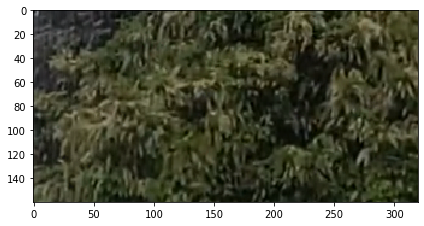

In [ ]:
import matplotlib.pyplot as plt

sio.imshow(final)
plt.show()

## Citations
- BasicSR = https://github.com/xinntao/BasicSR
- ESRGAN = https://github.com/xinntao/ESRGAN
- SPANet = https://stevewongv.github.io/derain-project.html Paper = https://arxiv.org/abs/1904.01538